In [16]:
import numpy as np
import sys
sys.path.append('../') 
from reclab.environments.topics import Topics
from reclab.recommenders.libfm.libfm import LibFM
import matplotlib.pyplot as plt

# Illustration of Different User Behaviors

In this notebook, for a fixed level of model and user behavior complexity, we illustrate the effect of different time-varying user behaviors on recommendation system quality. 
Specifically, we evaluate two metrics: observed ratings of recommended items, and predictive accuracy on recommended items. We may also want to look at diversity metrics, or those used in other papers.

In [22]:
num_users = 100
num_items = 170
rating_frequency = 0.2
num_init_ratings = 1000

def main(env):
    recommender = LibFM(num_user_features=0, num_item_features=0, 
                        num_rating_features=0, max_num_users=num_users, 
                        max_num_items=num_items)

    # First generate the items and users to seed the dataset.
    print("Initializing environment and recommender")
    items, users, ratings = env.reset()
    recommender.reset(items, users, ratings)

    mean_ratings = []
    mses = []
    # Now recommend items to users.
    print("Making online recommendations")
    for i in range(10):
        online_users = env.online_users()
        ret, predicted_ratings = recommender.recommend(online_users, num_recommendations=1)
        recommendations = ret[:, 0]
        items, users, ratings, info = env.step(recommendations)
        recommender.update(users, items, ratings)
        rating_arr = []
        for (rating, _), pred in zip(ratings.values(), predicted_ratings):
            rating_arr.append([rating, pred])
        rating_arr = np.array(rating_arr)
        errors = rating_arr[:,0] - rating_arr[:,1]
        mean_ratings.append(np.mean(rating_arr[:, 0]))
        mses.append(np.mean(errors**2))
        print("Iter:", i, "Mean:", mean_ratings[-1], "MSE:", mses[-1])

    ratings = env.all_ratings()
    return mean_ratings, mses

## Static User Behavior

Here, the user model does not change over time. TODO: implement run with static topic model

In [20]:
env = Topics(num_topics=10, num_users=num_users, num_items=num_items, 
             num_init_ratings=num_init_ratings, rating_frequency=rating_frequency)
mean_ratings, mses = main(env)

Initializing environment and recommender
Making online recommendations
Constructing test_inputs
Writing libfm files
Running libfm
Reading in predicitions
Iter: 0 Mean: 2.7 MSE: [2.05462432]
Constructing test_inputs
Writing libfm files
Running libfm
Reading in predicitions
Iter: 1 Mean: 3.5 MSE: [1.44125409]
Constructing test_inputs
Writing libfm files
Running libfm
Reading in predicitions
Iter: 2 Mean: 3.25 MSE: [1.93999898]
Constructing test_inputs
Writing libfm files
Running libfm
Reading in predicitions
Iter: 3 Mean: 3.1 MSE: [2.64655187]
Constructing test_inputs
Writing libfm files
Running libfm
Reading in predicitions
Iter: 4 Mean: 3.35 MSE: [2.03109112]
Constructing test_inputs
Writing libfm files
Running libfm
Reading in predicitions
Iter: 5 Mean: 3.0 MSE: [2.04627714]
Constructing test_inputs
Writing libfm files
Running libfm
Reading in predicitions
Iter: 6 Mean: 3.45 MSE: [1.90428059]
Constructing test_inputs
Writing libfm files
Running libfm
Reading in predicitions
Iter: 7 Me

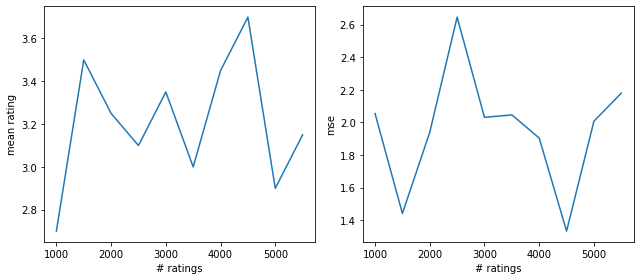

In [29]:
plt.figure(figsize=[9,4])
plt.subplot(1,2,1)
xs = num_init_ratings + num_users/rating_frequency * np.arange(len(mean_ratings))
plt.plot(xs, mean_ratings, label='mean rating')
plt.xlabel('# ratings'); plt.ylabel('mean rating')
plt.subplot(1,2,2)
plt.plot(xs, mses, label='mse')
plt.xlabel('# ratings'); plt.ylabel('mse')
plt.tight_layout()
plt.show()

## Partially Hidden User Behavior

Here, there is a portion of item utility that is unknown to a user until the item is consumed. From the paper "How Algorithmic Confounding in Recommendation Systems
Increases Homogeneity and Decreases Utility".

## User Interests Shift with Exposure

Here, the underlying user interest changes over time to match the body of items that have been recommended.

In [30]:
env = Topics(num_topics=10, num_users=num_users, num_items=num_items, 
             num_init_ratings=num_init_ratings, rating_frequency=rating_frequency,
             topic_change=0.1)
mean_ratings, mses = main(env)

Initializing environment and recommender
Making online recommendations
Constructing test_inputs
Writing libfm files
Running libfm
Reading in predicitions
Iter: 0 Mean: 3.1 MSE: [1.7575761]
Constructing test_inputs
Writing libfm files
Running libfm
Reading in predicitions
Iter: 1 Mean: 3.2 MSE: [2.56668587]
Constructing test_inputs
Writing libfm files
Running libfm
Reading in predicitions
Iter: 2 Mean: 3.5 MSE: [1.39635982]
Constructing test_inputs
Writing libfm files
Running libfm
Reading in predicitions
Iter: 3 Mean: 3.25 MSE: [1.61369541]
Constructing test_inputs
Writing libfm files
Running libfm
Reading in predicitions
Iter: 4 Mean: 3.2 MSE: [2.71551511]
Constructing test_inputs
Writing libfm files
Running libfm
Reading in predicitions
Iter: 5 Mean: 3.75 MSE: [1.55283858]
Constructing test_inputs
Writing libfm files
Running libfm
Reading in predicitions
Iter: 6 Mean: 3.4 MSE: [1.70112789]
Constructing test_inputs
Writing libfm files
Running libfm
Reading in predicitions
Iter: 7 Mean

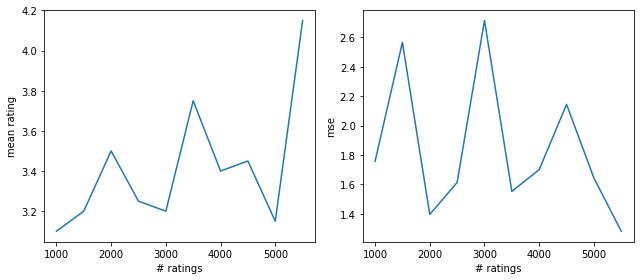

In [31]:
plt.figure(figsize=[9,4])
plt.subplot(1,2,1)
xs = num_init_ratings + num_users/rating_frequency * np.arange(len(mean_ratings))
plt.plot(xs, mean_ratings, label='mean rating')
plt.xlabel('# ratings'); plt.ylabel('mean rating')
plt.subplot(1,2,2)
plt.plot(xs, mses, label='mse')
plt.xlabel('# ratings'); plt.ylabel('mse')
plt.tight_layout()
plt.show()

## User Gets Bored

Here, user interest decreases for items too similar to those that they have recently been exposed to, with some decay in the effect.

In [32]:
env = Topics(num_topics=10, num_users=num_users, num_items=num_items, 
             num_init_ratings=num_init_ratings, rating_frequency=rating_frequency,
             topic_change=-0.1)
mean_ratings, mses = main(env)

Initializing environment and recommender
Making online recommendations
Constructing test_inputs
Writing libfm files
Running libfm
Reading in predicitions
Iter: 0 Mean: 3.6 MSE: [2.34818855]
Constructing test_inputs
Writing libfm files
Running libfm
Reading in predicitions
Iter: 1 Mean: 3.1 MSE: [2.01679645]
Constructing test_inputs
Writing libfm files
Running libfm
Reading in predicitions
Iter: 2 Mean: 3.2 MSE: [1.82489823]
Constructing test_inputs
Writing libfm files
Running libfm
Reading in predicitions
Iter: 3 Mean: 3.35 MSE: [1.62998357]
Constructing test_inputs
Writing libfm files
Running libfm
Reading in predicitions
Iter: 4 Mean: 3.05 MSE: [1.65732604]
Constructing test_inputs
Writing libfm files
Running libfm
Reading in predicitions
Iter: 5 Mean: 2.85 MSE: [1.72033344]
Constructing test_inputs
Writing libfm files
Running libfm
Reading in predicitions
Iter: 6 Mean: 3.45 MSE: [2.23256709]
Constructing test_inputs
Writing libfm files
Running libfm
Reading in predicitions
Iter: 7 M

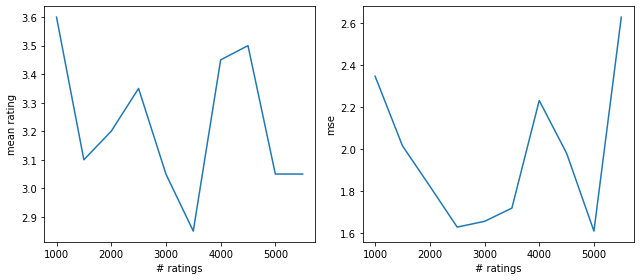

In [33]:
plt.figure(figsize=[9,4])
plt.subplot(1,2,1)
xs = num_init_ratings + num_users/rating_frequency * np.arange(len(mean_ratings))
plt.plot(xs, mean_ratings, label='mean rating')
plt.xlabel('# ratings'); plt.ylabel('mean rating')
plt.subplot(1,2,2)
plt.plot(xs, mses, label='mse')
plt.xlabel('# ratings'); plt.ylabel('mse')
plt.tight_layout()
plt.show()

## User Interests Shift, also Gets Bored

This is a combination of the previous two cases, where users gradually become more interested in topics that they are exposed to, but also exhibit boredom when they see many similar items in a row.